In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_formats = ['retina']
plt.style.use('seaborn-dark')

In [10]:
page_metrics = pd.read_csv('clean_data/page_metrics.csv', index_col='hID')
page_metrics.rename({'page_impressions':'impressions_per_day','page_cta_clicks_logged_in_total':'clicks_per_day'},axis=1,inplace=True)
print(page_metrics.shape)
page_metrics.head()

(444, 2)


,impressions_per_day,clicks_per_day
hID,,
-9185217652402180575,3.734914,0.004310
-9175544061209790002,42227.849138,0.102371
-9156617651427282577,138128.620690,0.000000
-9145254332915205176,61178.931034,1.365302
-9124186022016029939,14145.385776,0.050647


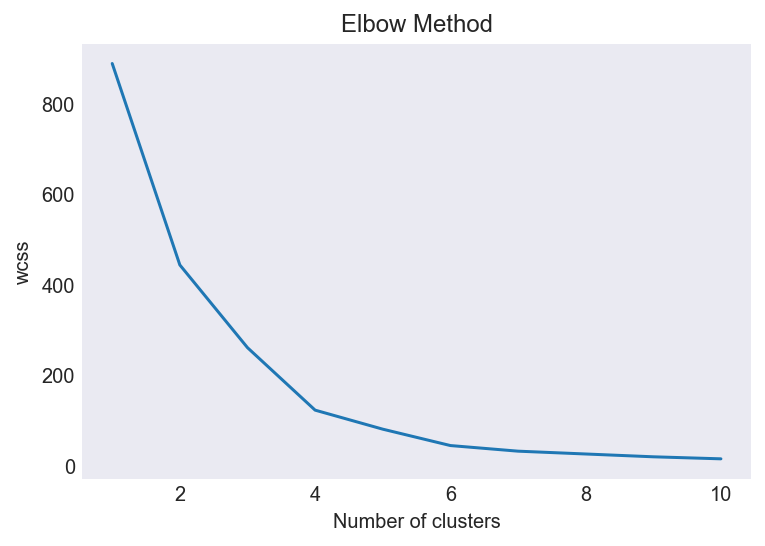

In [11]:
# Scale X
scaler = StandardScaler()
X = scaler.fit_transform(page_metrics)

# Use the elbow method
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

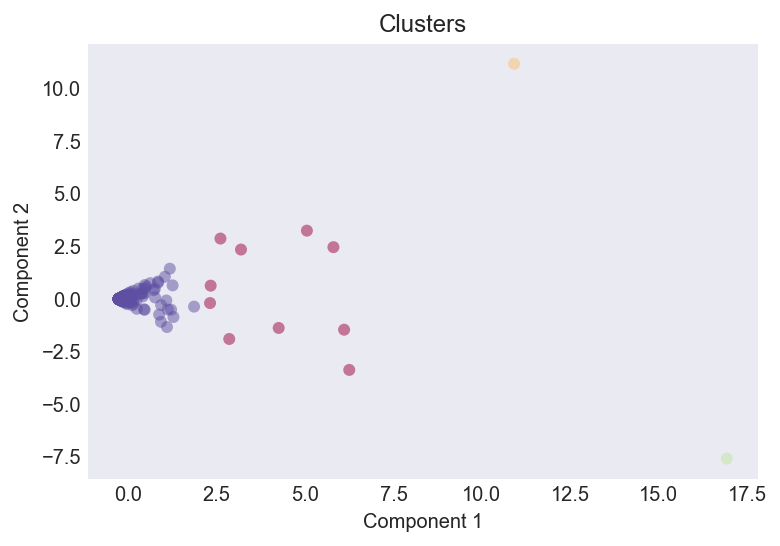

In [13]:
# Fit K-means
kmeans = KMeans(n_clusters=4, random_state=42)
y_means = kmeans.fit_predict(X)
page_metrics['cluster'] = y_means

# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

# Transform samples using the PCA fit
pca_2d = pca.transform(X)

# fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none",
            cmap=plt.cm.get_cmap("Spectral_r", 4),
            alpha=0.5)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Clusters')
plt.show()

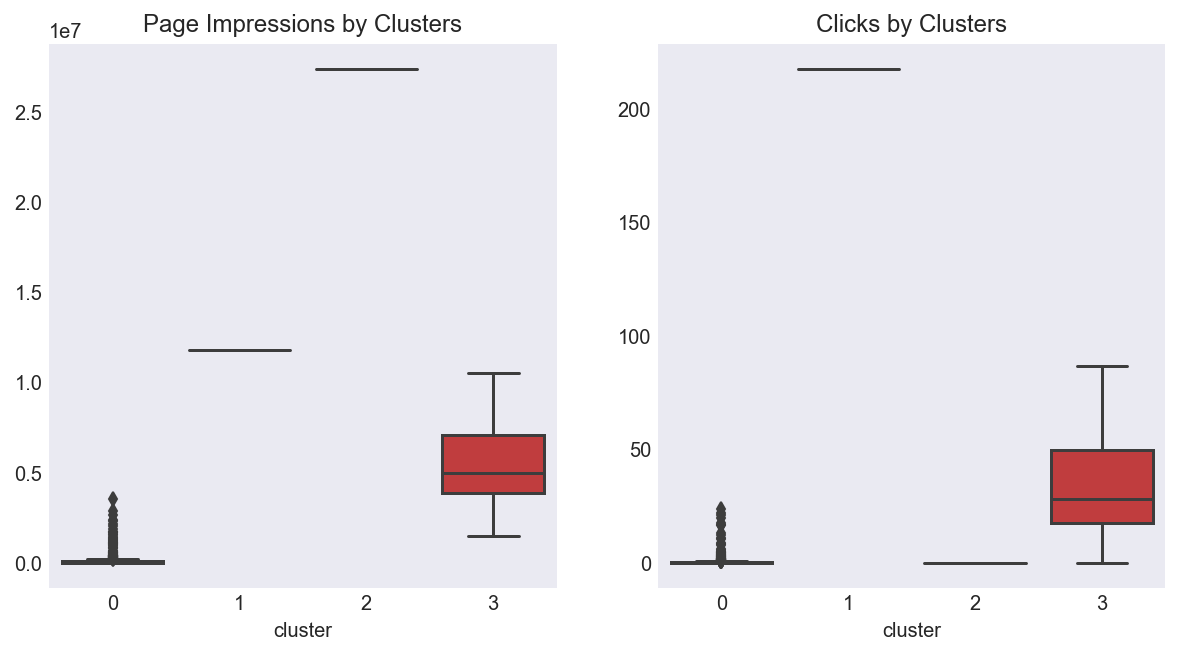

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=page_metrics, x='cluster', y='impressions_per_day')
plt.title('Page Impressions by Clusters'); plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(data=page_metrics, x='cluster', y='clicks_per_day')
plt.title('Clicks by Clusters'); plt.ylabel('')
plt.show()

In [28]:
page_metrics['CTR'] = page_metrics.clicks_per_day / page_metrics.impressions_per_day

In [31]:
page_metrics.groupby('cluster').CTR.mean()

cluster
0    0.000091
1    0.000018
2    0.000000
3    0.000010
Name: CTR, dtype: float64

In [32]:
page_metrics.query('cluster == 3')

,impressions_per_day,clicks_per_day,cluster,CTR
hID,,,,
-7031402007221657066,3.970609e+06,17.221983,3,0.000004
-5076733458132235418,3.867350e+06,86.813578,3,0.000022
-4068021820648955467,1.045967e+07,31.650862,3,0.000003
-3300241700544378190,3.863752e+06,51.781250,3,0.000013
-2997669780920391933,7.048046e+06,0.000000,3,0.000000
4643034808656860916,1.050125e+07,18.173491,3,0.000002
5291306812915208260,6.027474e+06,68.758621,3,0.000011
5846808040579860367,1.510553e+06,44.096983,3,0.000029
5945684069320962196,7.120837e+06,9.692888,3,0.000001


# Conclusion
By clustering the page metrics data, we want to make business sense by manually examining each cluster. As a result:
- cluster 0 - low page impressions and low clicks (inactive pages)
- cluster 1 - average page impressions and high clicks (a page with with high clicks)
- cluster 2 - high page impressions and zero clicks (most popular page with no clicks)
- cluster 3 - average page impressions and average clicks (pages in between)